In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from time import *
import os
from datetime import datetime, timedelta
from tensorflow.keras import layers
import tensorflow as tf
from keras.utils import plot_model

In [28]:
df = pd.read_csv('ready_dataset.csv')

In [29]:
df.index = pd.to_datetime(df['Time'])

In [30]:
df.drop(['Time'], axis=1, inplace=True)

In [31]:
# I will decide which variables to normalize and which to scale, all variables are numeric

df.describe()

,Prognozowane zapotrzebowanie sieci,generacjaJW,zrodla_odnawialne,Niedyspozycyjnosc,saldo,month,day_of_week,hour,da1_price
count,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.00000,8808.000000
mean,16627.343324,16182.321072,3796.726612,141.408833,445.033719,6.550409,2.991826,12.50000,563.643269
std,3059.620133,3113.161021,2666.277645,368.607862,1142.701418,3.454379,1.995322,6.92258,213.508018
min,9403.000000,8846.000000,12.000000,0.000000,-4732.000000,1.000000,0.000000,1.00000,-25.000000
25%,14414.750000,13940.750000,1523.000000,0.000000,-107.000000,4.000000,1.000000,6.75000,450.000000
50%,16366.500000,15939.000000,3291.000000,0.000000,199.000000,7.000000,3.000000,12.50000,536.860000
75%,18742.000000,18199.750000,5736.250000,0.000000,1176.000000,10.000000,5.000000,18.25000,665.000000
max,24313.000000,24438.000000,13934.000000,3154.000000,4617.000000,12.000000,6.000000,24.00000,1482.310000


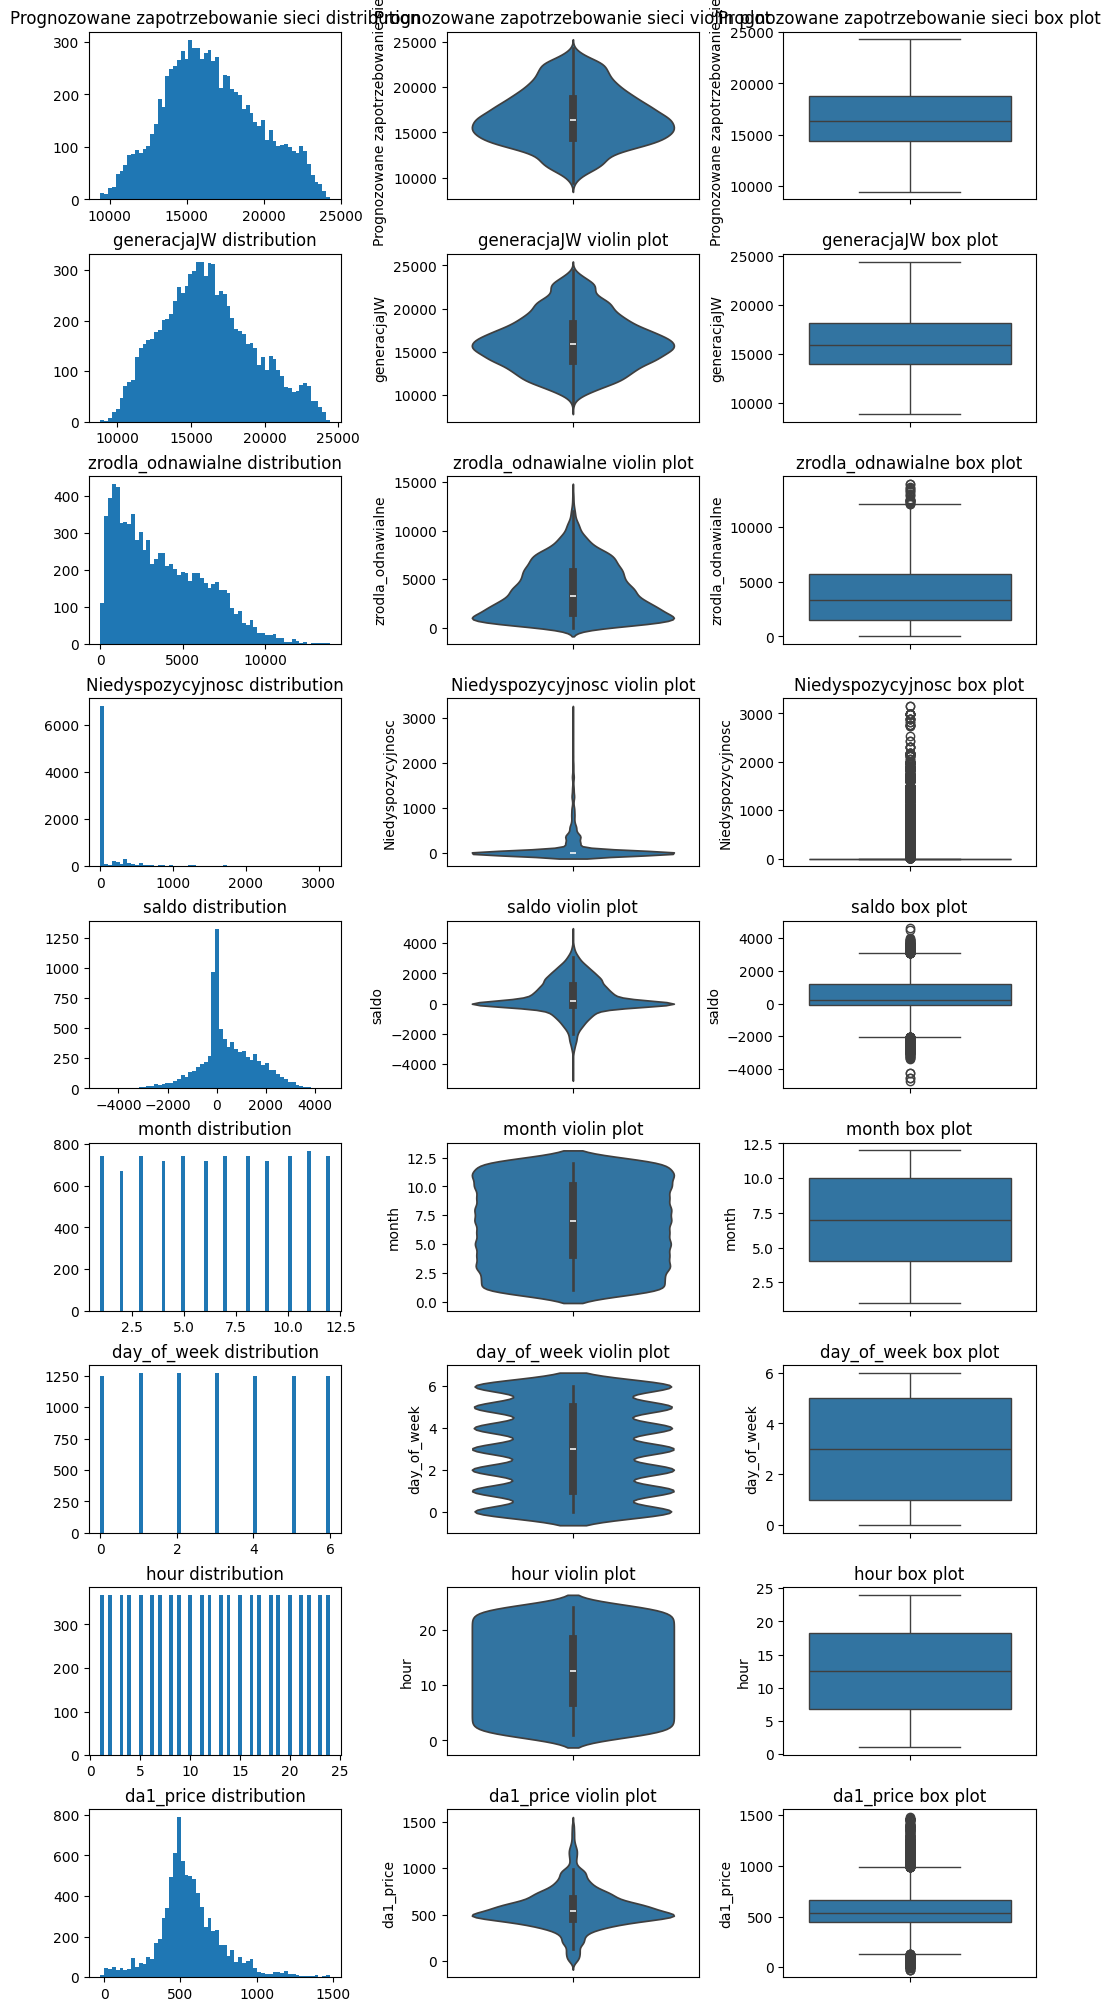

In [32]:
rows = len(df.columns)
cols = 3
fig, axs = plt.subplots(rows, cols, constrained_layout=True, figsize=(10,20))
axes = axs.T.ravel()

i=0
for col in df.columns:
    i+=1
    ax = plt.subplot(rows, cols,i)
    plt.hist(df[col], bins = 60)
    ax.set_xlabel(None)
    ax.set_title(f'{col[:50]} distribution')
    
    i+=1
    ax = plt.subplot(rows, cols,i)
    sns.violinplot(df[col])
    ax.set_xlabel(None)
    ax.set_title(f'{col[:50]} violin plot')
    
    i+=1
    ax = plt.subplot(rows, cols,i)
    sns.boxplot(df[col])
    ax.set_xlabel(None)
    ax.set_title(f'{col[:50]} box plot')

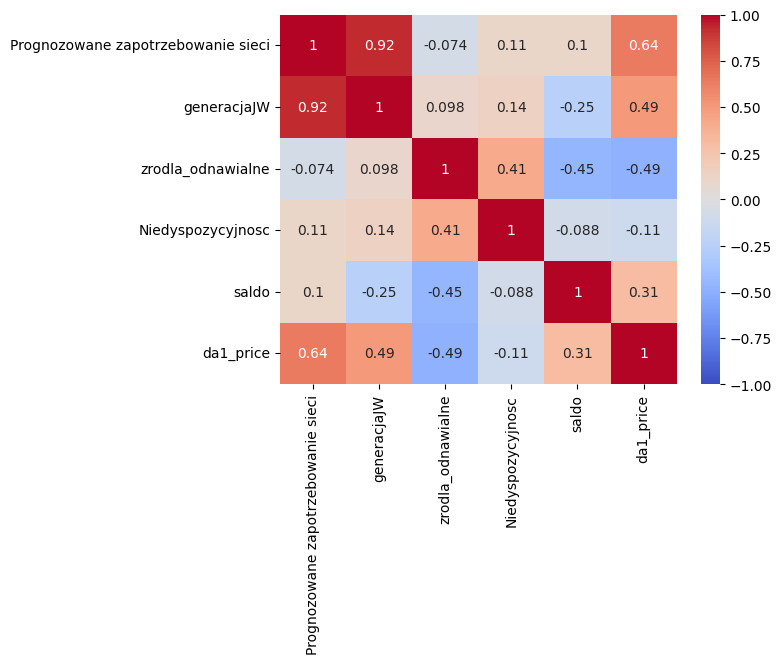

In [33]:
# let's forget about last 3, there are not really Gaussian distributions so I will normalize all. (expect month, day and hour of course)
sns.heatmap(df.drop(['day_of_week','month','hour'],axis=1).corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

In [34]:
for col in df.drop(['da1_price','hour','month','day_of_week'], axis = 1).columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [35]:
df

,Prognozowane zapotrzebowanie sieci,generacjaJW,zrodla_odnawialne,Niedyspozycyjnosc,saldo,month,day_of_week,hour,da1_price
Time,,,,,,,,,
2022-11-22 00:00:00+00:00,0.578672,0.558876,0.023991,0.000000,0.556530,11,1,1,870.0
2022-11-22 01:00:00+00:00,0.480885,0.479797,0.022267,0.000000,0.532570,11,1,2,830.0
2022-11-22 02:00:00+00:00,0.499598,0.493522,0.027510,0.000000,0.539523,11,1,3,800.0
2022-11-22 03:00:00+00:00,0.496244,0.493843,0.031605,0.000000,0.533533,11,1,4,789.0
2022-11-22 04:00:00+00:00,0.498592,0.485826,0.044749,0.000000,0.550647,11,1,5,820.0
...,...,...,...,...,...,...,...,...,...
2023-11-23 19:00:00+00:00,0.884641,0.908992,0.563568,0.529486,0.460691,11,3,20,374.0
2023-11-23 20:00:00+00:00,0.873441,0.907196,0.569602,0.529486,0.445716,11,3,21,329.0
2023-11-23 21:00:00+00:00,0.832529,0.871601,0.566370,0.529486,0.439726,11,3,22,250.0


In [46]:
# beginning of mdoel creation
df_ml = df.copy()

In [49]:
# let's create sequential shifts of hours (let's say 2 days would be enough), let's put last 2 days as a test scope. I will test more on current data (till today after webscrapping)
for i in range(48):
  df_ml[f"hour-{i+1}"] = df_ml["da1_price"].shift(periods=i+1)
df_ml = df_ml.dropna()

In [50]:
df_ml

,Prognozowane zapotrzebowanie sieci,generacjaJW,zrodla_odnawialne,Niedyspozycyjnosc,saldo,month,day_of_week,hour,da1_price,hour-1,...,hour-39,hour-40,hour-41,hour-42,hour-43,hour-44,hour-45,hour-46,hour-47,hour-48
Time,,,,,,,,,,,,,,,,,,,,,
2022-11-24 00:00:00+00:00,0.605366,0.582029,0.026002,0.000000,0.560488,11,3,1,857.99,800.00,...,990.00,1034.79,998.00,949.64,870.00,820.00,789.00,800.00,830.0,870.0
2022-11-24 01:00:00+00:00,0.557814,0.551116,0.025930,0.000000,0.536207,11,3,2,807.00,857.99,...,961.80,990.00,1034.79,998.00,949.64,870.00,820.00,789.00,800.0,830.0
2022-11-24 02:00:00+00:00,0.535480,0.527450,0.014438,0.000000,0.540058,11,3,3,807.00,807.00,...,969.03,961.80,990.00,1034.79,998.00,949.64,870.00,820.00,789.0,800.0
2022-11-24 03:00:00+00:00,0.508317,0.491470,0.010559,0.000000,0.556744,11,3,4,809.00,807.00,...,980.00,969.03,961.80,990.00,1034.79,998.00,949.64,870.00,820.0,789.0
2022-11-24 04:00:00+00:00,0.497921,0.479284,0.009194,0.000000,0.560488,11,3,5,870.00,809.00,...,996.52,980.00,969.03,961.80,990.00,1034.79,998.00,949.64,870.0,820.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-23 19:00:00+00:00,0.884641,0.908992,0.563568,0.529486,0.460691,11,3,20,374.00,379.82,...,450.00,449.00,450.00,440.00,450.00,448.00,495.00,520.00,590.0,626.2
2023-11-23 20:00:00+00:00,0.873441,0.907196,0.569602,0.529486,0.445716,11,3,21,329.00,374.00,...,480.00,450.00,449.00,450.00,440.00,450.00,448.00,495.00,520.0,590.0
2023-11-23 21:00:00+00:00,0.832529,0.871601,0.566370,0.529486,0.439726,11,3,22,250.00,329.00,...,606.75,480.00,450.00,449.00,450.00,440.00,450.00,448.00,495.0,520.0


In [79]:
split_size = 8712
X_train, y_train = df_ml.drop(['da1_price'], axis = 1)[:split_size], df_ml['da1_price'][:split_size,]
X_test, y_test = df_ml.drop(['da1_price'], axis = 1)[split_size:], df_ml['da1_price'][split_size:,]

In [52]:
X_train

,Prognozowane zapotrzebowanie sieci,generacjaJW,zrodla_odnawialne,Niedyspozycyjnosc,saldo,month,day_of_week,hour,hour-1,hour-2,...,hour-39,hour-40,hour-41,hour-42,hour-43,hour-44,hour-45,hour-46,hour-47,hour-48
Time,,,,,,,,,,,,,,,,,,,,,
2022-11-24 00:00:00+00:00,0.605366,0.582029,0.026002,0.0,0.560488,11,3,1,800.00,900.00,...,990.00,1034.79,998.00,949.64,870.00,820.00,789.00,800.00,830.00,870.00
2022-11-24 01:00:00+00:00,0.557814,0.551116,0.025930,0.0,0.536207,11,3,2,857.99,800.00,...,961.80,990.00,1034.79,998.00,949.64,870.00,820.00,789.00,800.00,830.00
2022-11-24 02:00:00+00:00,0.535480,0.527450,0.014438,0.0,0.540058,11,3,3,807.00,857.99,...,969.03,961.80,990.00,1034.79,998.00,949.64,870.00,820.00,789.00,800.00
2022-11-24 03:00:00+00:00,0.508317,0.491470,0.010559,0.0,0.556744,11,3,4,807.00,807.00,...,980.00,969.03,961.80,990.00,1034.79,998.00,949.64,870.00,820.00,789.00
2022-11-24 04:00:00+00:00,0.497921,0.479284,0.009194,0.0,0.560488,11,3,5,809.00,807.00,...,996.52,980.00,969.03,961.80,990.00,1034.79,998.00,949.64,870.00,820.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-21 19:00:00+00:00,0.869215,0.816893,0.142149,0.0,0.589582,11,1,20,647.00,670.00,...,310.00,280.00,250.00,250.00,251.00,315.87,340.00,380.00,393.42,410.00
2023-11-21 20:00:00+00:00,0.854058,0.768471,0.163123,0.0,0.646165,11,1,21,626.20,647.00,...,365.00,310.00,280.00,250.00,250.00,251.00,315.87,340.00,380.00,393.42
2023-11-21 21:00:00+00:00,0.813280,0.729220,0.167792,0.0,0.646593,11,1,22,590.00,626.20,...,455.00,365.00,310.00,280.00,250.00,250.00,251.00,315.87,340.00,380.00


In [53]:
y_train

Time
2022-11-24 00:00:00+00:00    857.99
2022-11-24 01:00:00+00:00    807.00
2022-11-24 02:00:00+00:00    807.00
2022-11-24 03:00:00+00:00    809.00
2022-11-24 04:00:00+00:00    870.00
                              ...  
2023-11-21 19:00:00+00:00    626.20
2023-11-21 20:00:00+00:00    590.00
2023-11-21 21:00:00+00:00    520.00
2023-11-21 22:00:00+00:00    495.00
2023-11-21 23:00:00+00:00    448.00
Name: da1_price, Length: 8712, dtype: float64

In [60]:
# some callbacks from the internet
# best epoch 
cb_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="checkpoints/model-{epoch:02d}-{root_mean_squared_error:.3f}.hdf5",
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    verbose=1
)

# learning rate drop
cb_reducelr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    mode="min",
    factor=0.1,
    patience=5,
    verbose=1,
    min_lr=0.000001
)

# early stopping
cb_earlystop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    mode="min",
    min_delta=0.001,
    patience=10,
    verbose=1,
)

# CSV logger
cb_csvlogger = tf.keras.callbacks.CSVLogger(
    filename="training_log.csv",
    separator=",",
    append=False   
)

In [58]:
# LSTM model with the Functional API
inputs = layers.Input(shape=(56))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand a dimension
x = layers.BatchNormalization()(x)
x = layers.LSTM(512, activation="relu", return_sequences=True)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)
x = layers.BatchNormalization()(x)
x = layers.LSTM(512)(x)
x = layers.BatchNormalization()(x)
output = layers.Dense(1, activation="linear")(x)
model_lstm = tf.keras.Model(inputs=inputs, outputs=output, name="model_lstm")

# compile
model_lstm.compile(loss="mse",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [59]:
model_lstm.summary()

Model: "model_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 56)]              0         
                                                                 
 lambda (Lambda)             (None, 1, 56)             0         
                                                                 
 batch_normalization (Batch  (None, 1, 56)             224       
 Normalization)                                                  
                                                                 
 lstm (LSTM)                 (None, 1, 512)            1165312   
                                                                 
 batch_normalization_1 (Bat  (None, 1, 512)            2048      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 1, 512)            0

In [61]:
model_lstm.fit(X_train, y_train,
             epochs=100,
             batch_size=128,
             verbose=0,
             validation_data=(X_test, y_test),
             callbacks=[cb_checkpoint,
                        cb_reducelr,
                        cb_earlystop,
                        cb_csvlogger])
     



Epoch 1: val_loss improved from inf to 191534.29688, saving model to checkpoints\model-01-586.385.hdf5


c:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 191534.29688 to 189070.75000, saving model to checkpoints\model-02-566.638.hdf5

Epoch 3: val_loss improved from 189070.75000 to 184891.54688, saving model to checkpoints\model-03-542.501.hdf5

Epoch 4: val_loss improved from 184891.54688 to 182524.92188, saving model to checkpoints\model-04-515.037.hdf5

Epoch 5: val_loss improved from 182524.92188 to 179671.57812, saving model to checkpoints\model-05-485.235.hdf5

Epoch 6: val_loss improved from 179671.57812 to 146986.12500, saving model to checkpoints\model-06-446.615.hdf5

Epoch 7: val_loss improved from 146986.12500 to 130082.08594, saving model to checkpoints\model-07-400.216.hdf5

Epoch 8: val_loss improved from 130082.08594 to 91744.00000, saving model to checkpoints\model-08-347.494.hdf5

Epoch 9: val_loss improved from 91744.00000 to 56996.89453, saving model to checkpoints\model-09-291.242.hdf5

Epoch 10: val_loss improved from 56996.89453 to 33686.20703, saving model to checkpoints\model-10-

In [68]:
# Performance:
best_lstm_model = tf.keras.models.load_model("checkpoints\\model-18-41.810.hdf5")
model_lstm_preds = tf.squeeze(best_lstm_model.predict(X_test))
predictions = model_lstm_preds.numpy()

2/2 [==============================] - 0s 2ms/step


In [77]:
y_test['pred'] = predictions

In [80]:
y_test.index = np.arange(len(y_test.index))

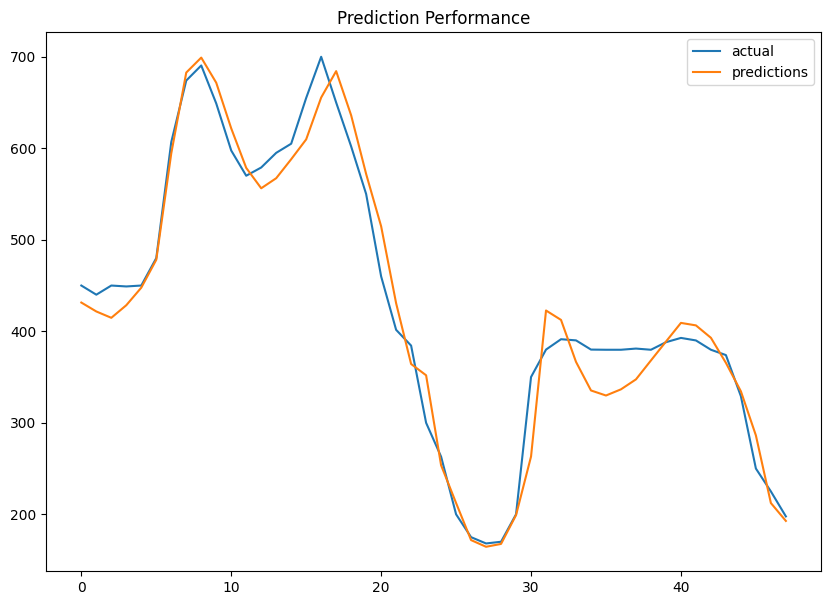

In [83]:
plt.figure(figsize=(10,7))
plt.plot(y_test, label="actual")
plt.plot(predictions, label="predictions")
plt.title("Prediction Performance")
plt.legend()

In [ ]:
# coś wyszło, super, później napiszę wnioski, teraz robimy api i web scrapping